

# Import Important Libraries



In [ ]:
import os
import pandas as pd
import numpy as np
import re

In [ ]:
# Define paths
data_path = "/kaggle/input/balanced-disaster-dataset"
output_path = "/kaggle/working/"

# Model Training and Evaluation Code

In [ ]:
# Load the merged dataset ===
file_path_model = "/kaggle/input/balanced-disaster-dataset/balanced_disaster_dataset.csv"
df_model = pd.read_csv(file_path_model, encoding='ISO-8859-1')
df_model

,tweet_id,tweet_text,label,clean_text,tokens,tweet_length,text,label_encoded
0,'451190193488683009',RT @thebeautyblogca: Chilean coast evacuated #...,displaced_people_and_evacuations,rt thebeautyblogca chilean coast evacuated tsu...,"['rt', 'chilean', 'coast', 'evacuated', 'tsuna...",8,rt chilean coast evacuated tsunami warning hou...,1
1,'501091102385254400',SPICE UP YA LIFE! RT @aemccarthy: Hold the fuc...,not_related_or_irrelevant,spice up ya life rt aemccarthy hold the fuckin...,"['spice', 'ya', 'life', 'rt', 'hold', 'fucking...",11,spice ya life rt hold fucking phone spice worl...,6
2,'504292716650717184',Listage: Best Food Cinema Gems; Costly Napa Ea...,other_useful_information,listage best food cinema gems costly napa eart...,"['listage', 'best', 'food', 'cinema', 'gems', ...",8,listage best food cinema gems costly napa eart...,7
3,'451327456264208384',RT @UniversalBN: https://t.co/fJUQlCseht #Chil...,other_useful_information,rt universalbn chile chileearthquake chilequak...,"['rt', 'chile', 'chileearthquake', 'chilequake...",8,rt chile chileearthquake chilequake chiletsuna...,7
4,'383421976213078016',150 trucks carrying supplies for #Balochistan ...,donation_needs_or_offers_or_volunteering_services,trucks carrying supplies for balochistan earth...,"['trucks', 'carrying', 'supplies', 'balochista...",10,trucks carrying supplies balochistan earthquak...,2
...,...,...,...,...,...,...,...,...
23242,'540812846460715008',"#RubyPH Guys, please be safe! :D",sympathy_and_emotional_support,rubyph guys please be safe,"['rubyph', 'guys', 'please', 'safe']",4,rubyph guys please safe,8
23243,'541476755156918274',Let's stay safe and continue praying as typhoo...,sympathy_and_emotional_support,lets stay safe and continue praying as typhoon...,"['lets', 'stay', 'safe', 'continue', 'praying'...",9,lets stay safe continue praying typhoon rubyph...,8
23244,'591909505841106944',My thoughts are with all our families @AutismC...,sympathy_and_emotional_support,my thoughts are with all our families autismca...,"['thoughts', 'families', 'autismspeaks', 'nepa...",4,thoughts families autismspeaks nepalearthquake,8
23245,'511710591833370625',Hoping @RockAndBrews San Jose is making it thr...,sympathy_and_emotional_support,hoping rockandbrews san jose is making it thro...,"['hoping', 'san', 'jose', 'making', 'odile', '...",12,hoping san jose making odile prayers everyone ...,8


In [ ]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## BERT Classification (using HuggingFace Transformers)

In [ ]:
import torch
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
    DataCollatorWithPadding,
)
from sklearn.preprocessing import LabelEncoder

2025-05-25 10:06:06.687594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748167566.899574      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748167566.956627      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Paths and settings
model_name = "bert-base-uncased"
output_path = "/kaggle/working"

In [ ]:
# Define and fit LabelEncoder
bert_label_encoder = LabelEncoder()
df_model['label_encoded'] = bert_label_encoder.fit_transform(df_model['label'])
num_labels = len(bert_label_encoder.classes_)

# Save the label encoder
joblib.dump(bert_label_encoder, os.path.join(output_path, "bert_label_encoder.pkl"))

['/kaggle/working/bert_label_encoder.pkl']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_model['clean_text'], df_model['label_encoded'], test_size=0.2, random_state=42)

# Tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# Tokenize data
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class DisasterDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return {
            key: torch.tensor(val[idx]) for key, val in self.encodings.items()
        } | {'labels': torch.tensor(self.labels[idx])}

tokenized = {
    "train": DisasterDataset(train_encodings, y_train.tolist()),
    "test": DisasterDataset(test_encodings, y_test.tolist())
}

# Data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir=os.path.join(output_path, "bert_model"),
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir=os.path.join(output_path, "logs"),
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none",
    run_name="bert-disaster-detection",
)

# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        'accuracy': (preds == labels).astype(np.float32).mean().item()
    }

In [ ]:
# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train
trainer.train()

/tmp/ipykernel_35/632744060.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.477000,0.348016,0.897419
2,0.205500,0.333196,0.921505
3,0.091000,0.315236,0.936989


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


TrainOutput(global_step=3489, training_loss=0.31040396544133125, metrics={'train_runtime': 703.4398, 'train_samples_per_second': 79.312, 'train_steps_per_second': 4.96, 'total_flos': 1376264201409504.0, 'train_loss': 0.31040396544133125, 'epoch': 3.0})

In [ ]:
# Save model and tokenizer
trainer.save_model(os.path.join(output_path, "bert_model"))
tokenizer.save_pretrained(os.path.join(output_path, "bert_model"))

('/kaggle/working/bert_model/tokenizer_config.json',
 '/kaggle/working/bert_model/special_tokens_map.json',
 '/kaggle/working/bert_model/vocab.txt',
 '/kaggle/working/bert_model/added_tokens.json',
 '/kaggle/working/bert_model/tokenizer.json')

In [ ]:
# Step 1: Zip the folder
!zip -r bert_model.zip bert_model

# Step 2: Move the zip to the output path (optional)
import shutil
shutil.move("bert_model.zip", "/kaggle/working/bert_model.zip")

  adding: bert_model/ (stored 0%)
  adding: bert_model/config.json (deflated 56%)
  adding: bert_model/training_args.bin (deflated 52%)
  adding: bert_model/tokenizer.json (deflated 71%)
  adding: bert_model/checkpoint-3489/ (stored 0%)
  adding: bert_model/checkpoint-3489/config.json (deflated 56%)
  adding: bert_model/checkpoint-3489/training_args.bin (deflated 52%)
  adding: bert_model/checkpoint-3489/optimizer.pt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


 (deflated 22%)
  adding: bert_model/checkpoint-3489/tokenizer.json (deflated 71%)
  adding: bert_model/checkpoint-3489/trainer_state.json (deflated 66%)
  adding: bert_model/checkpoint-3489/scheduler.pt (deflated 56%)
  adding: bert_model/checkpoint-3489/rng_state.pth (deflated 25%)
  adding: bert_model/checkpoint-3489/vocab.txt (deflated 53%)
  adding: bert_model/checkpoint-3489/special_tokens_map.json (deflated 42%)
  adding: bert_model/checkpoint-3489/tokenizer_config.json (deflated 75%)
  adding: bert_model/checkpoint-3489/model.safetensors (deflated 7%)
  adding: bert_model/checkpoint-1163/ (stored 0%)
  adding: bert_model/checkpoint-1163/config.json (deflated 56%)
  adding: bert_model/checkpoint-1163/training_args.bin (deflated 52%)
  adding: bert_model/checkpoint-1163/optimizer.pt (deflated 22%)
  adding: bert_model/checkpoint-1163/tokenizer.json (deflated 71%)
  adding: bert_model/checkpoint-1163/trainer_state.json (deflated 58%)
  adding: bert_model/checkpoint-1163/scheduler.

'/kaggle/working/bert_model.zip'

In [ ]:
from IPython.display import FileLink

# Create a download link for the zip file
FileLink(r'bert_model.zip')

/kaggle/working/bert_model.zip

In [ ]:
# Evaluate
predictions = trainer.predict(tokenized["test"])
preds = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, preds, target_names=bert_label_encoder.classes_))


Classification Report:
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.91      0.98      0.94       464
                 displaced_people_and_evacuations       0.98      1.00      0.99       517
donation_needs_or_offers_or_volunteering_services       0.93      0.95      0.94       465
              infrastructure_and_utilities_damage       0.94      0.96      0.95       530
                           injured_or_dead_people       0.97      0.98      0.97       529
                  missing_trapped_or_found_people       0.98      1.00      0.99       535
                        not_related_or_irrelevant       0.94      0.91      0.92       518
                         other_useful_information       0.81      0.70      0.75       529
                   sympathy_and_emotional_support       0.95      0.97      0.96       563

                                         accuracy               

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract logs
logs = trainer.state.log_history

# Initialize
train_loss, eval_loss, eval_acc = [], [], []
train_epochs, eval_epochs = [], []

# Parse logs
for log in logs:
    if "loss" in log and "epoch" in log:
        train_loss.append(log["loss"])
        train_epochs.append(log["epoch"])
    if "eval_loss" in log and "epoch" in log:
        eval_loss.append(log["eval_loss"])
        eval_acc.append(log.get("eval_accuracy", None))
        eval_epochs.append(log["epoch"])

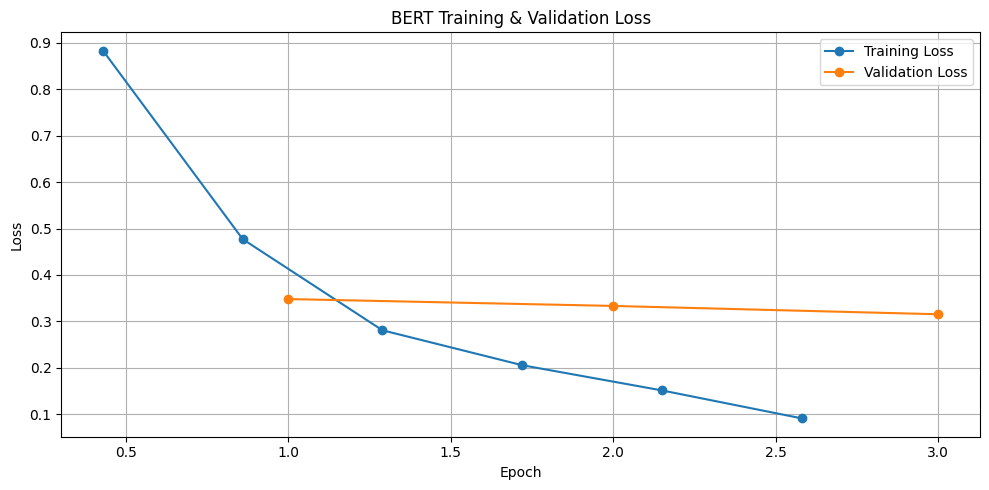

In [ ]:
# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_epochs, train_loss, label="Training Loss", marker='o')
plt.plot(eval_epochs, eval_loss, label="Validation Loss", marker='o')
plt.title("BERT Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

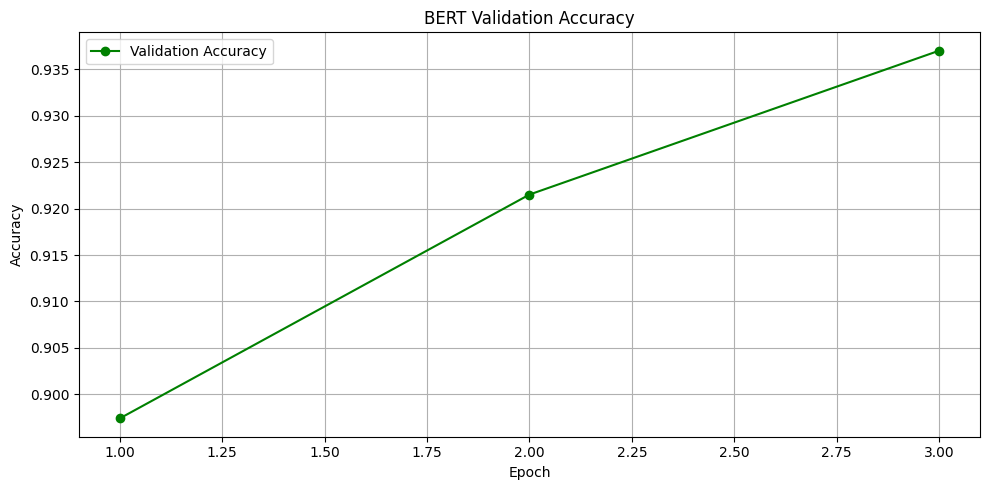

In [ ]:
# Plot Accuracy
if any(eval_acc):
    plt.figure(figsize=(10, 5))
    plt.plot(eval_epochs, eval_acc, label="Validation Accuracy", color="green", marker='o')
    plt.title("BERT Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Sample Predictions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import torch
import joblib
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset

In [2]:
# Load CSV
unseen_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/output/unbalanced.csv")

# Define Dataset
class UnseenDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)

    def __getitem__(self, idx):
        return {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}

    def __len__(self):
        return len(self.encodings["input_ids"])

# Load tokenizer + model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model_path = "/content/drive/MyDrive/Colab Notebooks/Project/output/bert_model"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [3]:
# Prepare Dataset
texts = unseen_df["clean_text"].astype(str).tolist()
unseen_dataset = UnseenDataset(texts, tokenizer)

# Predict
from torch.utils.data import DataLoader
unseen_loader = DataLoader(unseen_dataset, batch_size=8)

all_preds = []
with torch.no_grad():
    for batch in unseen_loader:
        inputs = {k: v.to(model.device) for k, v in batch.items()}
        outputs = model(**inputs)
        logits = outputs.logits
        batch_preds = torch.argmax(logits, axis=1)
        all_preds.extend(batch_preds.cpu().numpy())

In [8]:
# Decode predictions to label names
label_encoder = joblib.load("/content/drive/MyDrive/Colab Notebooks/Project/output/bert_model/bert_label_encoder.pkl")
predicted_labels = label_encoder.inverse_transform(all_preds)

# Save and display
df_result = pd.DataFrame({
    "clean_text": texts,
    "predicted_label": predicted_labels
})

df_result.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/output/bert_predictions.csv", index=False)
df_result.head()

,clean_text,predicted_label
0,hurricane odile strikes mexicos baja californi...,displaced_people_and_evacuations
1,rt mrazaharoon more dams and administrativeuni...,other_useful_information
2,oprah so what about earthquakenepal,not_related_or_irrelevant
3,harrystyles can you send message of force to c...,other_useful_information
4,rt levimitchell prayers for philippines during...,sympathy_and_emotional_support


In [7]:
unseen_df

,tweet_id,tweet_text,label,clean_text,tokens,predicted_label
0,'511564050979774465',Hurricane Odile Strikes Mexico's Baja Californ...,displaced_people_and_evacuations,hurricane odile strikes mexicos baja californi...,"['hurricane', 'odile', 'strikes', 'mexicos', '...",displaced_people_and_evacuations
1,'514728929572425728',RT @mrazaharoon: More #dams and #administrativ...,caution_and_advice,rt mrazaharoon more dams and administrativeuni...,"['rt', 'dams', 'needed', 'face', 'floods', 'mi...",other_useful_information
2,'593630828644663296',@Oprah so what about #earthquakenepal,other_useful_information,oprah so what about earthquakenepal,"['oprah', 'earthquakenepal']",not_related_or_irrelevant
3,'452152091058774017',@Harry_Styles Can you send a message of force ...,sympathy_and_emotional_support,harrystyles can you send message of force to c...,"['harrystyles', 'send', 'message', 'force', 'c...",other_useful_information
4,'541459542400176128',RT @levimitchell: Prayers for PHILIPPINES duri...,sympathy_and_emotional_support,rt levimitchell prayers for philippines during...,"['rt', 'prayers', 'philippines', 'typhoon']",sympathy_and_emotional_support
...,...,...,...,...,...,...
8686,'577010775836860416',Cyclone Pam: Why Japan is a leader in disaster...,other_useful_information,cyclone pam why japan is leader in disaster re...,"['cyclone', 'pam', 'japan', 'leader', 'disaste...",other_useful_information
8687,'451282740227620865',"Chile hit by 8.2 magnitude earthquake, five ki...",injured_or_dead_people,chile hit by magnitude earthquake five killed ...,"['chile', 'hit', 'magnitude', 'earthquake', 'f...",injured_or_dead_people
8688,'511526536638234624',RT @Asadumar_fc: CRIMES of #NawazSharif 18. El...,other_useful_information,rt asadumarfc crimes of nawazsharif electricit...,"['rt', 'crimes', 'nawazsharif', 'electricity',...",other_useful_information
8689,'501334408306393089',Nepal asked India to open three dams to reliev...,injured_or_dead_people,nepal asked india to open three dams to reliev...,"['nepal', 'asked', 'india', 'open', 'three', '...",injured_or_dead_people
